## Coding our way through linear regression :)

### Polynomial Regression

A model that has a higher order term for the independent variable. If we see a plot that has a non-linear relationship between x and y this can be expressed by interaction variables. Let's look at a dataset that focuses on the relationship between home size (in square feet) and kilowatt hours per month of power consumption.

### First using Statsmodels

In [6]:
import pandas as pd
auto = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv',na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [7]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


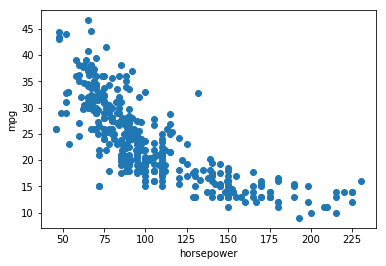

In [8]:
import matplotlib.pyplot as plt
plt.scatter(auto.horsepower,auto.mpg)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

In [9]:
auto['horsepower_squared'] = auto['horsepower'] **2

In [10]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower_squared
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,22500.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,19600.0


In [13]:
import seaborn as sns
import statsmodels.api as sm
import pylab
import statsmodels.formula.api as smf
est = smf.ols('mpg ~ horsepower + horsepower_squared', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           5.40e-99
Time:                        11:41:36   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1.800     31.604      0.000      53.360      60.440
horsepower            -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower_squared     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
est = smf.ols('mpg ~ horsepower', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           7.03e-81
Time:                        11:42:06   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Polynomial Regression using sci-kit learn 

In [15]:
import numpy as np
home_size = np.array([1290,1350,1470,1600,1710,1840,1980,2230,2400,2930])
kw_hours_month = np.array([1182, 1172, 1264, 1493, 1571, 1711, 1804, 1840, 1956, 1954])


data from https://www.statsdirect.com/help/regression_and_correlation/polynomial.htm

resource on calculating in python : http://www.science.smith.edu/~jcrouser/SDS293/labs/2016/lab12/Lab%2012%20-%20Polynomial%20Regression%20and%20Step%20Functions%20in%20Python.pdf


quality resource on polynomial regressions in general: http://home.iitk.ac.in/~shalab/regression/Chapter12-Regression-PolynomialRegression.pdf

Text(0,0.5,'KW hours/month')

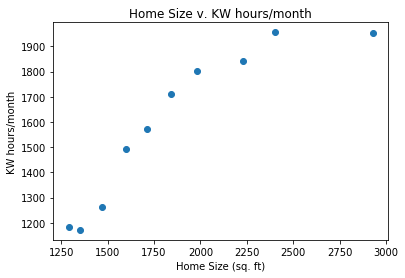

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(home_size,kw_hours_month)
plt.title('Home Size v. KW hours/month')
plt.xlabel('Home Size (sq. ft)')
plt.ylabel('KW hours/month')

Ass we can see, this does not appear to be a purely linear relationship, especially as the home size gets larger. We can see that the slope of the line appears to be decreasing as we move along.

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=2)
X2 = poly.fit_transform(home_size.reshape(-1,1))
X3 = PolynomialFeatures(3).fit_transform(home_size.reshape(-1,1))
X4 = PolynomialFeatures(4).fit_transform(home_size.reshape(-1,1))
# predict_ = poly.fit_transform([kw_hours_month])

In [18]:
X2

array([[1.0000e+00, 1.2900e+03, 1.6641e+06],
       [1.0000e+00, 1.3500e+03, 1.8225e+06],
       [1.0000e+00, 1.4700e+03, 2.1609e+06],
       [1.0000e+00, 1.6000e+03, 2.5600e+06],
       [1.0000e+00, 1.7100e+03, 2.9241e+06],
       [1.0000e+00, 1.8400e+03, 3.3856e+06],
       [1.0000e+00, 1.9800e+03, 3.9204e+06],
       [1.0000e+00, 2.2300e+03, 4.9729e+06],
       [1.0000e+00, 2.4000e+03, 5.7600e+06],
       [1.0000e+00, 2.9300e+03, 8.5849e+06]])

In [19]:
X3

array([[1.0000000e+00, 1.2900000e+03, 1.6641000e+06, 2.1466890e+09],
       [1.0000000e+00, 1.3500000e+03, 1.8225000e+06, 2.4603750e+09],
       [1.0000000e+00, 1.4700000e+03, 2.1609000e+06, 3.1765230e+09],
       [1.0000000e+00, 1.6000000e+03, 2.5600000e+06, 4.0960000e+09],
       [1.0000000e+00, 1.7100000e+03, 2.9241000e+06, 5.0002110e+09],
       [1.0000000e+00, 1.8400000e+03, 3.3856000e+06, 6.2295040e+09],
       [1.0000000e+00, 1.9800000e+03, 3.9204000e+06, 7.7623920e+09],
       [1.0000000e+00, 2.2300000e+03, 4.9729000e+06, 1.1089567e+10],
       [1.0000000e+00, 2.4000000e+03, 5.7600000e+06, 1.3824000e+10],
       [1.0000000e+00, 2.9300000e+03, 8.5849000e+06, 2.5153757e+10]])

In [ ]:
model.fit()
model.predict()
model.transform()

$ y = \beta_{0} + \beta_{1}*homesize + \beta_{2}*homesize^2$

$ y = \beta_{0} + \beta_{1}*homesize + \beta_{2}*homesize^2 + \beta_{3}*homesize^3$

$ y = \beta_{0} + \beta_{1}*homesize + \beta_{2}*homesize^2 + \beta_{3}*homesize^3 + \beta_{4}*homesize^4$

In [20]:
lr2 = LinearRegression()
lr3 = LinearRegression()
lr4 = LinearRegression()
lr2.fit(X2, kw_hours_month)
lr3.fit(X3, kw_hours_month)
lr4.fit(X4, kw_hours_month)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
lr2.coef_

In [ ]:
lr3.coef_

In [22]:
x_values.shape

(1000,)

In [24]:
x_values.reshape(-1,1).shape

(1000, 1)

Text(0,0.5,'KW hours/month')

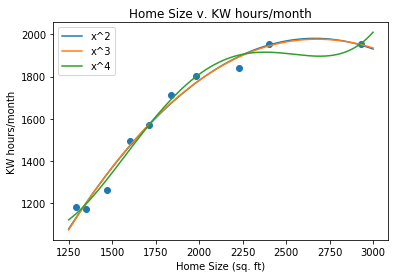

In [21]:
import numpy as np
# np.polyfit()
x_values = np.linspace(1250,3000,num=1000)

x2 = poly.fit_transform(x_values.reshape(-1,1))
x3 = PolynomialFeatures(3).fit_transform(x_values.reshape(-1,1))
x4 = PolynomialFeatures(4).fit_transform(x_values.reshape(-1,1))
plt.scatter(home_size,kw_hours_month)
plt.plot(x_values,lr2.predict(x2),label='x^2')

plt.plot(x_values, lr3.predict(x3),label= 'x^3')
plt.plot(x_values,lr4.predict(x4),label='x^4')
plt.title('Home Size v. KW hours/month')
plt.legend()
plt.xlabel('Home Size (sq. ft)')
plt.ylabel('KW hours/month')

#### We can take a look at the residuals of the graph to determine our line is a good fit

more on graphing residuals: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

<img src = "./resources/residuals.gif">

In [ ]:
import seaborn as sns
import statsmodels.api as sm
import pylab

sns.residplot(lr2.predict(X2),kw_hours_month)

#### What conclusions could be drawn from our data. Would the conclusions be correct?

In [ ]:
## another way to fit a polynomial to the data

np.polyfit(home_size,kw_hours_month,2)

How to determine the optimal amount for the polynomial?

* Use cross-validation to determine which model performs best on the validation set. If you keep increasing the degree of polynomial, you will eventually reach a line that fits the data perfectly (with zero error). This will of course be overfitting.

* Think about your domain of interest. Does it make sense to represent a relationship with polynomials?

* Use caution when extrapolating information about the regions of the graph that do not contain any x-values

### Multivariable Regression

As we have seen before, we can also create linear regression models that include many different features.
<img src = "./resources/multivariate_regression.png" width= 400>

### Interaction of Features

We can also include interaction terms if we think some terms might be related to one another, or might have a synergestic effect.

resource: http://www.medicine.mcgill.ca/epidemiology/Joseph/courses/EPIB-621/interaction.pdf
python code resource: https://www.dummies.com/programming/big-data/data-science/data-science-how-to-create-interactions-between-variables-with-python/


## Using stats_models

In [25]:
import pandas as pd

df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [26]:
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


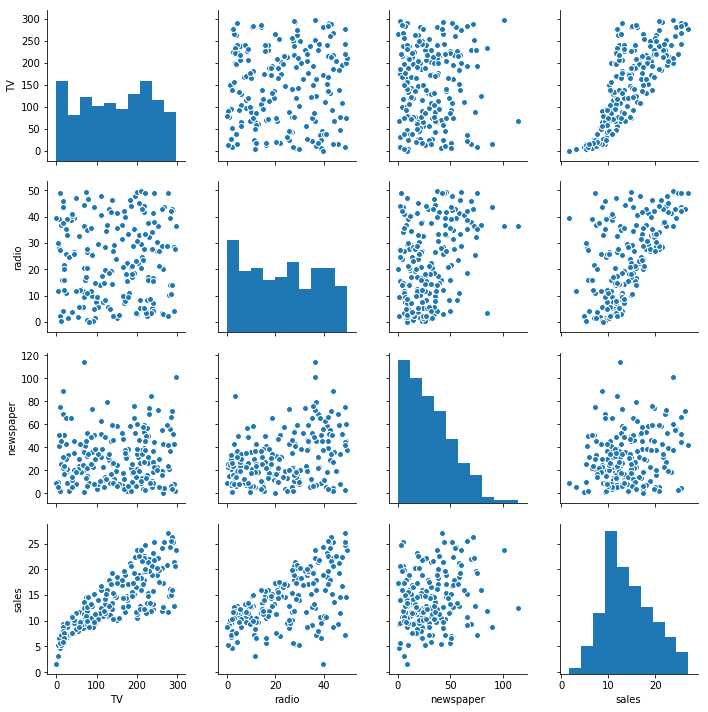

In [27]:
sns.pairplot(df_adv)

In [28]:
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.58e-96
Time:                        11:51:02   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
import statsmodels.formula.api as smf
est = smf.ols('sales ~ TV + radio + TV*radio', df_adv).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 04 Dec 2018   Prob (F-statistic):          6.68e-146
Time:                        11:51:23   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df_adv.corr()

### Using scit-kit learn

In [ ]:
interaction = PolynomialFeatures(interaction_only=True,include_bias = True)
roof_size = np.array([ 898.89890263, 1046.3126949 , 1131.85749656, 1177.18625417,
        1325.40425546, 1421.2689302 , 1527.02678084, 1820.04347174,
       2006.89606897, 2534.16123764])
# X = np.hstack((home_size,roof_size))
X = np.stack((home_size,roof_size),axis=-1)
X_interaction = interaction.fit_transform(X,kw_hours_month)
model = LinearRegression()
model.fit(X_interaction,kw_hours_month)

In [ ]:
model.coef_

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_predicted = model.predict(X_interaction)
y_actual = kw_hours_month
rms = sqrt(mean_squared_error(y_actual, y_predicted))
rms


In [ ]:
model_nointeraction = LinearRegression()
model_nointeraction.fit(X,kw_hours_month)

y_pred_no_interaction = model_nointeraction.predict(X)


In [ ]:
sqrt(mean_squared_error(y_actual, y_pred_no_interaction))

## Working with categorical variables

In [30]:
df_credit = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv',index_col=0)

In [43]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [31]:
df_credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [40]:
dummy_df = pd.get_dummies(df_credit)
# dummy_df = pd.get_dummies(df_credit)

In [41]:
dummy_df.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,333,0,1,1,0,0,1,0,0,1
2,106.025,6645,483,3,82,15,903,1,0,0,1,0,1,0,1,0
3,104.593,7075,514,4,71,11,580,0,1,1,0,1,0,0,1,0
4,148.924,9504,681,3,36,11,964,1,0,1,0,1,0,0,1,0
5,55.882,4897,357,2,68,16,331,0,1,1,0,0,1,0,0,1


In [42]:
dummy_df = pd.get_dummies(df_credit,drop_first=True)
dummy_df.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Male,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,333,1,0,1,0,1
2,106.025,6645,483,3,82,15,903,0,1,1,1,0
3,104.593,7075,514,4,71,11,580,1,0,0,1,0
4,148.924,9504,681,3,36,11,964,0,0,0,1,0
5,55.882,4897,357,2,68,16,331,1,0,1,0,1


In [38]:
est_credit = smf.ols('Balance ~ Married_Yes', dummy_df).fit()
est_credit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.01281
Date:                Tue, 04 Dec 2018   Prob (F-statistic):              0.910
Time:                        11:56:48   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     523.2903     36.974     14.153      0.000     450.601     595.980
Married_Yes    -5.3475     47.244     -0.113      0.910     -98.227      87.532
==============================================================================
Omnibus:                       28.640   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.347
Skew:                           0.582   Prob(JB):                     1.15e-06
Kurtosis:                       2.464   Cond. No.                         2.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Credit goes to:

https://github.com/JWarmenhoven/ISLR-python for the python code

Introduction to Statistical Learning for the examples

